In [27]:
# Plot Waveform
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

wl1_arrivals = []   # Array to store the arrival times of the requests in workload 1
wl1_durations = []  # Array to store the duration of each requests in workload 1

with open('workloads/workload_1.txt', 'r') as file:
    for line in file:
        (wl1_arrival, wl1_duration) = line.split()
        wl1_arrivals.append(int(wl1_arrival))
        wl1_durations.append(int(wl1_duration))
       
# Generate Machine Status

# Initialize the status list
status = []
active_durations = []
inactive_durations = []


# Determine the status of the machine at each timestamp
for i in range(len(wl1_arrivals)):
    if i == 0:
        # The machine is active from the first arrival time to the end of its duration
        active_durations.append((wl1_arrivals[i] + wl1_durations[i]))
        inactive_durations.append(wl1_arrivals[i + 1] - wl1_durations[i])
    else:
        # The machine is inactive from the end of the previous duration to the next arrival time
        active_period = wl1_arrivals[i] + wl1_durations[i]
        active_durations.append(active_period)
        if i != len(wl1_arrivals) - 1:
            inactive_durations.append(wl1_arrivals[i+1] - active_period)

print (wl1_durations)
print (inactive_durations)
print("The minimum inactive duration is: ", min(inactive_durations))
print("The maximum inactive duration is: ", max(inactive_durations))


# The break even time is 0.8ms 
# Show in which cases it is convenient to switch off the machine, when the inactive duration is higher than the break even time
for i in range(len(inactive_durations)):
    if inactive_durations[i] > 0.8:
        status.append('OFF')
    else:
        status.append('ON')

# Compute the percentage of OFF state over the total entries
off_state = status.count('OFF')
print('Percentage of OFF state: ', off_state/len(status)*100)




[32, 5, 5, 4, 4, 235, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 255, 4, 5, 4, 4, 4, 5, 5, 4, 5, 4, 181, 1, 3, 3, 2, 2, 0, 0, 4, 5, 4, 328, 1, 2, 3, 1, 4, 4, 5, 4, 4, 5, 318, 2, 4, 5, 5, 5, 4, 3, 5, 4, 5, 293, 3, 2, 0, 0, 4, 5, 4, 5, 5, 5, 319, 1, 1, 2, 3, 3, 3, 3, 3, 3, 4, 325, 2, 1, 1, 0, 2, 2, 2, 2, 2, 5, 327, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4]
[3, 3, 4, 4, 4, 119970, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 120012, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 119993, 0, 0, 0, 1, 1, 3, 2, 3, 4, 4, 119910, 1, 0, 0, 2, 4, 4, 4, 3, 4, 4, 119901, 3, 4, 3, 3, 4, 4, 4, 3, 4, 3, 119893, 0, 1, 3, 2, 4, 4, 4, 3, 3, 4, 119876, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 119917, 1, 2, 2, 1, 1, 1, 1, 1, 3, 3, 119957, 4, 4, 4, 4, 3, 4, 4, 3, 4]
The minimum inactive duration is:  0
The maximum inactive duration is:  120012
Percentage of OFF state:  82.52427184466019


[(0, 'ACTIVE'), (32, 'INACTIVE'), (35, 'ACTIVE'), (40, 'INACTIVE'), (43, 'ACTIVE'), (48, 'INACTIVE'), (52, 'ACTIVE'), (56, 'INACTIVE'), (60, 'ACTIVE'), (64, 'INACTIVE'), (68, 'ACTIVE'), (303, 'INACTIVE'), (120273, 'ACTIVE'), (120276, 'INACTIVE'), (120276, 'ACTIVE'), (120278, 'INACTIVE'), (120279, 'ACTIVE'), (120282, 'INACTIVE'), (120282, 'ACTIVE'), (120285, 'INACTIVE'), (120285, 'ACTIVE'), (120288, 'INACTIVE'), (120289, 'ACTIVE'), (120291, 'INACTIVE'), (120292, 'ACTIVE'), (120294, 'INACTIVE'), (120294, 'ACTIVE'), (120297, 'INACTIVE'), (120297, 'ACTIVE'), (120300, 'INACTIVE'), (120301, 'ACTIVE'), (120304, 'INACTIVE'), (120307, 'ACTIVE'), (120562, 'INACTIVE'), (240574, 'ACTIVE'), (240578, 'INACTIVE'), (240581, 'ACTIVE'), (240586, 'INACTIVE'), (240590, 'ACTIVE'), (240594, 'INACTIVE'), (240598, 'ACTIVE'), (240602, 'INACTIVE'), (240606, 'ACTIVE'), (240610, 'INACTIVE'), (240613, 'ACTIVE'), (240618, 'INACTIVE'), (240621, 'ACTIVE'), (240626, 'INACTIVE'), (240629, 'ACTIVE'), (240633, 'INACTIVE'

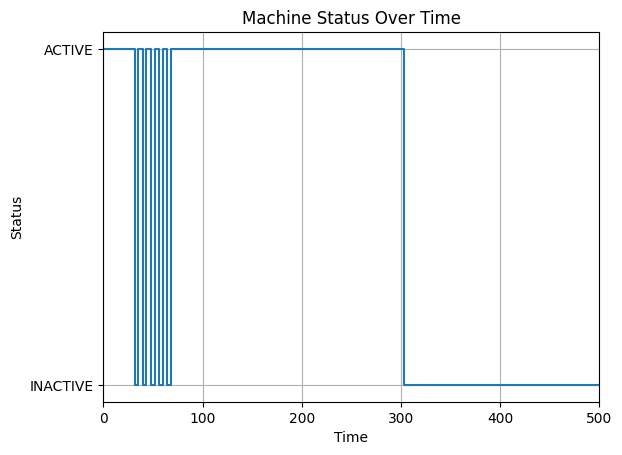

In [25]:
# Plot Waveform
import matplotlib.pyplot as plt


wl1_arrivals = []   # Array to store the arrival times of the requests in workload 1
wl1_durations = []  # Array to store the duration of each requests in workload 1



with open('workloads/workload_1.txt', 'r') as file:
    for line in file:
        (wl1_arrival, wl1_duration) = line.split()
        wl1_arrivals.append(int(wl1_arrival))
        wl1_durations.append(int(wl1_duration))
       
# Generate Machine Status

# Initialize the status list
status = []

# Determine the status of the machine at each timestamp
for i in range(len(wl1_arrivals)):
    if i == 0:
        # The machine is active from the first arrival time to the end of its duration
        status.append((wl1_arrivals[i], "ACTIVE"))
        status.append((wl1_arrivals[i] + wl1_durations[i], "INACTIVE"))
    else:
        # The machine is inactive from the end of the previous duration to the next arrival time
        status.append((wl1_arrivals[i], "ACTIVE"))
        status.append((wl1_arrivals[i] + wl1_durations[i], "INACTIVE"))

# Print the status list
print(status)

# Plot the waveform
timestamps = [time for time, state in status]
states = [1 if state == "ACTIVE" else 0 for time, state in status]

plt.step(timestamps, states, where='post')
plt.xlim(0, 500)  # Adjust the x-axis limits to zoom in
plt.xlabel('Time')
plt.ylabel('Status')
plt.title('Machine Status Over Time')
plt.yticks([0, 1], ['INACTIVE', 'ACTIVE'])
plt.grid(True)
plt.show()

